In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATA SETS 

In [19]:
X=pd.read_csv('X.csv').values
Y=pd.read_csv('Y.csv').values

Splitting data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [23]:
y_train = y_train.reshape(-1,1)

# Performing Logistic Regression

In [24]:
def hypothesis(x,b0,b1):  #eqn of line is y=b0+b1x
    z=np.dot(x,b1)+b0     #matrix multiplication
    return sigmoid(z)


def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

            
def error(y_true,x,b0,b1):    #error entropy function 
    err=0.0
    m=x.shape[0]
    for i in range(m):
        y_pred=hypothesis(x[i],b0,b1)
        err+=y_true[i]*np.log2(y_pred)+(1-y_true[i])*np.log2(1-y_pred)
        
    return -err/m
            
def get_grads(y_true,x,b0,b1):    #perfroms diff(b0) and diff(b1) to use in gradient descent
    grad_b1=np.zeros(b1.shape)
    grad_b0=0.0
    m=x.shape[0]
    for i in range(m):
        y_pred=hypothesis(x[i],b0,b1)
        grad_b1+=(y_true[i]-y_pred)*x[i]
        grad_b0+=(y_true[i]-y_pred)
    
    grad_b1/=m
    grad_b0/=m
    
    return grad_b0,grad_b1
            

def gradient_descent(y_true,x,b0,b1,learning_rate=0.1): #perform gradient descent to get new value of b0 b1 from previous values
    #same as b1+=learn_rate*diff(b1)....but we perform diff(b1)*x in above function for ease to uderstand 
    grad_b0,grad_b1=get_grads(y_true,x,b0,b1)
    b0=b0+learning_rate*grad_b0
    b1=b1+learning_rate*grad_b1
    return b0,b1

            


In [25]:
b1=2*np.random.random((X_train.shape[1],))  #here max curve is taken at random now at 0
b0=5*np.random.random()
loss=[]
for i in range(100): #max iterations
    err=error(y_train,X_train,b0,b1)
    b0,b1=gradient_descent(y_train,X_train,b0,b1,learning_rate=0.1)
    loss.append(err) 

In [26]:
print(loss)

[array([3.59261427]), array([3.42023496]), array([3.25137692]), array([3.08607204]), array([2.92438998]), array([2.76645242]), array([2.61244993]), array([2.4626609]), array([2.31747068]), array([2.17738659]), array([2.04304138]), array([1.91517472]), array([1.79458137]), array([1.68202136]), array([1.57810298]), array([1.4831698]), array([1.39723294]), array([1.31997413]), array([1.25081326]), array([1.1890082]), array([1.13375222]), array([1.08424802]), array([1.03975356]), array([0.99960446]), array([0.96322027]), array([0.93010153]), array([0.89982218]), array([0.87202031]), array([0.84638889]), array([0.82266727]), array([0.80063366]), array([0.78009875]), array([0.76090038]), array([0.74289908]), array([0.72597435]), array([0.71002168]), array([0.69495002]), array([0.68067969]), array([0.6671407]), array([0.6542713]), array([0.64201682]), array([0.63032865]), array([0.61916346]), array([0.60848244]), array([0.59825074]), array([0.58843698]), array([0.57901281]), array([0.56995253

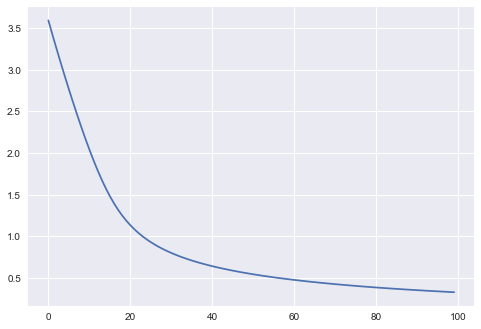

In [27]:
plt.style.use('seaborn')
plt.plot(loss)
plt.show()

WE CAN SEE FROM THE GRAPH THAT AS ITERATION INCREASES LOSS DECREASES AND AFTER SOME ITERATIONS IT BECOMES CONSTANT

# predicting for test data

In [34]:
Y_pred=hypothesis(X_test,b0,b1)
for i in range(Y_pred.shape[0]):
    if(Y_pred[i]>0.5):
        Y_pred[i]=1
    else:
        Y_pred[i]=0
Y_pred=pd.DataFrame(data=Y_pred,columns=["label"])
#Y_pred.to_csv('y_logistic_pred.csv',index=False)

In [29]:
print(b0) 
print(b1)

[0.57117377]
[-1.56062123  0.01908964 -0.93936291]


In [38]:
Y_pred=pd.DataFrame(data=Y_pred,columns=["label"]) #converting both to dataframe to apply metrics
Y_test=pd.DataFrame(data=y_test,columns=["label"])

# MODEL EVALUATION

In [39]:
from sklearn import metrics
confusion=metrics.confusion_matrix(Y_test,Y_pred)

In [40]:
print(confusion)

[[403  51]
 [  1 445]]


In [ ]:
#                   pred_not_churn    pred_churn
 
# actual_not_churn        403         51
# actual_churn            1          445

#this tells that 403 didnt churn and we also predicted the same
#51 did not churn but we predicted that they churned
#1 churn but we predited they dont churn
#445 churned and we predicted the same

In [41]:
metrics.accuracy_score(Y_test,Y_pred)

0.9422222222222222

tells us that what percentage of data correctly predicted here its 94%

In [42]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [43]:
#sensitivity is proportions of yes/1/true correctly predicted by our model
TP/float(TP+FN)

0.9975247524752475

it means we correctly predicted 1 for 99% of the data

In [45]:
#specificity is proportions of no/0/false correctly predicted by our model
TN / float(TN+FP)

0.8971774193548387

it means we correctly predicted 0 for 89% of the data

In [46]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

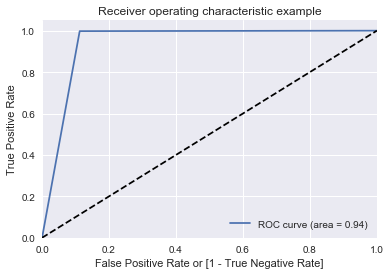

(array([0.       , 0.1123348, 1.       ]),
 array([0.        , 0.99775785, 1.        ]),
 array([2., 1., 0.]))

In [47]:
draw_roc(Y_test,Y_pred)

The point at top of triangle tells us about the model..
it should be more close to top left corner 1 if model is good
area 94 tells that 94% accuracy